<a href="https://colab.research.google.com/github/NNEKUS/-data-engineering-project-template./blob/main/Copy_of_Copy_of_Copy_of_My_Data_Cleaning_and_Enrichment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [ ]:
def get_count():
    url = "https://www.worldometers.info/coronavirus/"

    r = requests.get(url)
    html = r.text

    soup = BeautifulSoup(html)
    table = soup.find('table', {"class": "table table-bordered table-hover main_table_countries"})
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])

    # result = pd.DataFrame(data, columns = ['CountryOther',    'TotalCases',    'NewCases',    'TotalDeaths',    'NewDeaths',    'TotalRecovered',    'ActiveCases',    'Serious/Critical',    'TotCases/1Mpop',    'Deaths/1Mpop'])

    # Step 3: Analyze the HTML tag, where your content lives

    # Find the country list table in the webpage, using find returns the first occurence 
    my_table = soup.find('table',{'id':'main_table_countries_today'})

    # Find all table rows in the first table (i.e. the table of interest)
    table_rows = my_table.find_all('tr')

    # Since the country names are the first button in each row, find all buttons from the 
    # 1st row and return their text. 
    # we use 'td' because td is the closing html tag
    countries = [row.find('td') for row in table_rows]

    # print(countries)

    pd.options.display.max_rows
    pd.options.display.max_rows = 999
    df = pd.DataFrame()
    df['Country'] = countries
    df

    cases=[]
    for row in table_rows:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        cases.append(cols)

    # Getting attribute name 
    # find the tables 
    attribute_tag = my_table.find_all('th')
    attribute=[]
    for i in attribute_tag:
        attribute.append(i.text)

    df=pd.DataFrame(cases,columns=attribute)

    df_new=df[1:-1]

    result = df_new.fillna("Nan")

    return result


In [ ]:
df_test = get_count()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    246 non-null    object
 1   Country,Other        246 non-null    object
 2   TotalCases           246 non-null    object
 3   NewCases             246 non-null    object
 4   TotalDeaths          246 non-null    object
 5   NewDeaths            246 non-null    object
 6   TotalRecovered       246 non-null    object
 7   NewRecovered         246 non-null    object
 8   ActiveCases          246 non-null    object
 9   Serious,Critical     246 non-null    object
 10  Tot Cases/1M pop     246 non-null    object
 11  Deaths/1M pop        246 non-null    object
 12  TotalTests           246 non-null    object
 13  Tests/
1M pop
       246 non-null    object
 14  Population           246 non-null    object
 15  Continent            246 non-null    object
 16  1 Caseev

In [ ]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,249,732",+789,"1,595,841",+8,"118,214,446","+6,215","3,439,445","8,738",,,,,,North America,,,,,,
2,,Asia,"212,602,852","+52,167","1,528,229",+291,"197,108,394","+98,082","13,966,229","16,037",,,,,,Asia,,,,,,
3,,Europe,"244,709,684","+10,628","2,004,992",+87,"240,354,694","+51,283","2,349,998","6,552",,,,,,Europe,,,,,,
4,,South America,"67,679,713",+203,"1,346,955",,"65,722,703","+7,029","610,055","10,236",,,,,,South America,,,,,,
5,,Oceania,"13,888,211","+1,510","25,232",+4,"13,718,809","+1,981","144,170",77,,,,,,Australia/Oceania,,,,,,
6,,Africa,"12,771,837",,"258,487",,"12,057,437",,"455,913",547,,,,,,Africa,,,,,,
7,,,721,,15,,706,,0,0,,,,,,,,,,,,
8,,World,"674,902,750","+65,297","6,759,751",+390,"647,177,189","+164,590","20,965,810","42,187","86,584",867.2,,,,All,,,,,,
9,1,USA,"104,115,370",,"1,132,256",,"101,241,496",,"1,741,618","3,572","310,973","3,382","1,159,352,643","3,462,767","334,805,269",North America,3,296,0,,,"5,202"
10,2,India,"44,682,719",,"530,740",,"44,150,131",,"1,848",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,,,1


In [ ]:
##we want to see all the columns without the eclipses

pd.set_option("display.max.columns", None)

In [ ]:
df_test.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,249,732",+789,"1,595,841",+8,"118,214,446","+6,215","3,439,445","8,738",,,,,,North America,,,,,,
2,,Asia,"212,602,852","+52,167","1,528,229",+291,"197,108,394","+98,082","13,966,229","16,037",,,,,,Asia,,,,,,
3,,Europe,"244,709,684","+10,628","2,004,992",+87,"240,354,694","+51,283","2,349,998","6,552",,,,,,Europe,,,,,,
4,,South America,"67,679,713",+203,"1,346,955",,"65,722,703","+7,029","610,055","10,236",,,,,,South America,,,,,,
5,,Oceania,"13,888,211","+1,510","25,232",+4,"13,718,809","+1,981","144,170",77,,,,,,Australia/Oceania,,,,,,


In [ ]:
##since empty cells are null values, we replace them with NaN

df_test = df_test.replace('', np.nan)
df_test = df_test.replace('N/A', np.nan)

In [ ]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,NaN,North America,"123,249,732",+789,"1,595,841",+8,"118,214,446","+6,215","3,439,445","8,738",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,602,852","+52,167","1,528,229",+291,"197,108,394","+98,082","13,966,229","16,037",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,709,684","+10,628","2,004,992",+87,"240,354,694","+51,283","2,349,998","6,552",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,South America,"67,679,713",+203,"1,346,955",NaN,"65,722,703","+7,029","610,055","10,236",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,211","+1,510","25,232",+4,"13,718,809","+1,981","144,170",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,771,837",NaN,"258,487",NaN,"12,057,437",NaN,"455,913",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"674,902,750","+65,297","6,759,751",+390,"647,177,189","+164,590","20,965,810","42,187","86,584",867.2,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
9,1,USA,"104,115,370",NaN,"1,132,256",NaN,"101,241,496",NaN,"1,741,618","3,572","310,973","3,382","1,159,352,643","3,462,767","334,805,269",North America,3,296,0,NaN,NaN,"5,202"
10,2,India,"44,682,719",NaN,"530,740",NaN,"44,150,131",NaN,"1,848",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,NaN,NaN,1


In [ ]:
df_test.isnull()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
4,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
5,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
6,True,False,False,True,False,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True
7,True,True,False,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
8,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True
9,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
10,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
##we install some dependencies to help us explore our dataset

!pip install requests pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


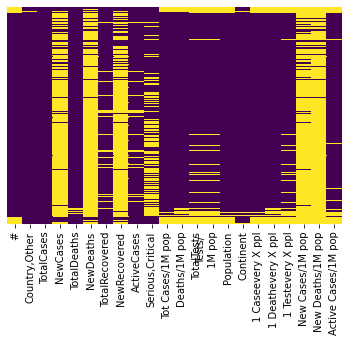

In [ ]:
##visualize the extent of null values in the dataset

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
##I checked for the percentage of null values in the columns

df_test.isnull().mean() * 100

#                       6.097561
Country,Other           0.406504
TotalCases              0.000000
NewCases               82.520325
TotalDeaths             2.439024
NewDeaths              89.024390
TotalRecovered          8.536585
NewRecovered           80.081301
ActiveCases             7.723577
Serious,Critical       39.430894
Tot Cases/1M pop        6.504065
Deaths/1M pop           8.943089
TotalTests             13.414634
Tests/\n1M pop\n       13.414634
Population              6.910569
Continent               1.626016
1 Caseevery X ppl       6.910569
1 Deathevery X ppl      9.349593
1 Testevery X ppl      13.414634
New Cases/1M pop       86.991870
New Deaths/1M pop      92.682927
Active Cases/1M pop     9.756098
dtype: float64

### #NewCases has 82.926%, NewDeaths has 89.024%, NewRecovered has 80.489%, New Cases/1M pop has 87.398% and New Deaths/1M pop has 92.682% null values. These are way higher than the acceptable 50% threshold, hence, these columns have to be dropped.

In [ ]:
##let's drop all the columns with more than 50% null values

df_test = df_test.drop(['NewCases', 'NewDeaths', 'NewRecovered', 'New Cases/1M pop', 'New Deaths/1M pop'], axis=1)
df_test.head()

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,"123,249,732","1,595,841","118,214,446","3,439,445","8,738",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,602,852","1,528,229","197,108,394","13,966,229","16,037",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,709,684","2,004,992","240,354,694","2,349,998","6,552",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,"67,679,713","1,346,955","65,722,703","610,055","10,236",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,211","25,232","13,718,809","144,170",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
